In [ ]:
from googleapiclient.discovery import build
import pandas as pd
import os
from dotenv import load_dotenv
load_dotenv()
API_KEY = os.getenv("YOUTUBE_API_KEY")
VIDEO_ID = "rovtk0lxZFk"
youtube = build("youtube", "v3", developerKey=API_KEY)

In [8]:
def get_video_comments(video_id):
    comments = []
    next_page = None

    while True:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,          # maximum allowed
            pageToken=next_page,
            textFormat="plainText"
        )
        response = request.execute()

        for item in response["items"]:
            snippet = item["snippet"]["topLevelComment"]["snippet"]
            comments.append({
                "comment_id": item["id"],
                "author": snippet["authorDisplayName"],
                "text": snippet["textDisplay"],
                "published_at": snippet["publishedAt"],
                "likes": snippet["likeCount"]
            })

        next_page = response.get("nextPageToken")
        if not next_page:
            break

    return pd.DataFrame(comments)


In [9]:
df_comments = get_video_comments(VIDEO_ID)

print("Total comments fetched:", len(df_comments))
df_comments.head()


Total comments fetched: 241


,comment_id,author,text,published_at,likes
0,UgzmS5cRAQ_6pMx1EN14AaABAg,@jamesgh2479,Love XQC but bros gone off on tangents trying ...,2025-12-01T21:04:53Z,0
1,UgxwQaPVslZXeq4P-qB4AaABAg,@akalion213,Xqc pretending to have less money than Charlie...,2025-11-26T17:07:54Z,0
2,Ugxuq1vg7WwGSm9TA2p4AaABAg,@AkanagamaR6,not me watching XQC at 2x watching charlie at ...,2025-10-30T16:01:28Z,0
3,Ugzx0lFxEArsnnk_M2B4AaABAg,@SamuelLime,6:55 i agree. why can't we just have fun??? 😭😭😭,2025-10-24T22:15:44Z,0
4,UgzeCkcfHpfBTNXkDpd4AaABAg,@yuriWasDumb,man .. seeing this just makes me wanna end it ...,2025-10-23T21:28:04Z,0


In [18]:
df_comments.tail()

,comment_id,author,text,published_at,likes
236,UgwwAMV6B7bPbTfZfiZ4AaABAg,@rbsdrummer,I love when a video 2x’s another video and the...,2025-10-16T14:13:44Z,732
237,UgwGTdYIS8IGUDRLEzd4AaABAg,@joadaadada5837,22:20 holy rich,2025-10-16T14:12:56Z,12
238,Ugz0oXvnHZHttKOIoPl4AaABAg,@DepressionBustNoWipeREAL,here before the 'my farts are better' bots,2025-10-16T14:09:47Z,41
239,UgyxWz4KCT0zNuqm_Yd4AaABAg,@conneworkshop,35k Spins 😮‍💨,2025-10-16T14:09:42Z,7
240,UgwiO6Nk0wnXI6030mR4AaABAg,@ElizabethWarrenOklahoma,Xqcs food,2025-10-16T14:09:10Z,0


In [10]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    241 non-null    object
 1   author        241 non-null    object
 2   text          241 non-null    object
 3   published_at  241 non-null    object
 4   likes         241 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 9.5+ KB


In [15]:
df_comments[df_comments['likes'] == df_comments['likes'].max()]


,comment_id,author,text,published_at,likes
215,UgyRlXmEergRMgTyTuF4AaABAg,@limundosel6284,5 mil revenue and editor can't edit 80% of his...,2025-10-16T14:55:04Z,1802


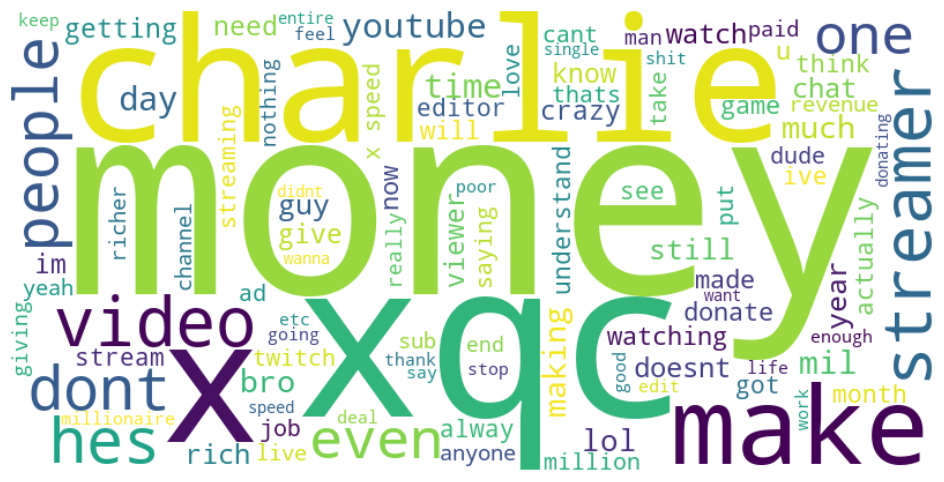

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

text_blob = " ".join(df_comments["text"].astype(str).apply(clean_text))

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100
).generate(text_blob)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.title("Word Cloud of YouTube Video Comments")
plt.show()


In [19]:
top_liked = df_comments.sort_values("likes", ascending=False).head(30)
top_liked

,comment_id,author,text,published_at,likes
215,UgyRlXmEergRMgTyTuF4AaABAg,@limundosel6284,5 mil revenue and editor can't edit 80% of his...,2025-10-16T14:55:04Z,1802
235,Ugyj7vVrBoKGUzxFaRR4AaABAg,@DynamicPillared,"poor X only 5 mill, we should donate more",2025-10-16T14:17:58Z,784
236,UgwwAMV6B7bPbTfZfiZ4AaABAg,@rbsdrummer,I love when a video 2x’s another video and the...,2025-10-16T14:13:44Z,732
165,UgyUSSB0NpDoHPDBM6d4AaABAg,@halechvalma2713,editor makes 5 mil and just copy pastes the vo...,2025-10-16T16:48:20Z,728
182,UgxhM2xJHHQeGKR5g2Z4AaABAg,@thistora929,X editor is the type of sloth they talked abou...,2025-10-16T16:10:58Z,526
234,Ugxhr-MIt4FrPy2Ohf14AaABAg,@ByFireBePurged_,Says the guy who spends 10k per spin like its ...,2025-10-16T14:18:52Z,397
228,UgzZXTYN9DozpCZxWlB4AaABAg,@sauron55,Imagine study 7 years and work hard to gain a ...,2025-10-16T14:20:28Z,376
213,Ugz808XT--xCbpHnshV4AaABAg,@DerBlupp,dog died cat died grandma died but your stream...,2025-10-16T14:57:09Z,250
188,Ugz4nVklO1CmbjMOVnJ4AaABAg,@Adurite,"For those confused, he is still going to conti...",2025-10-16T15:53:52Z,231
174,Ugwxz1HG3j8vjHIDYr94AaABAg,@Mirici1,I don’t think people understand ad revenue is ...,2025-10-16T16:31:33Z,169


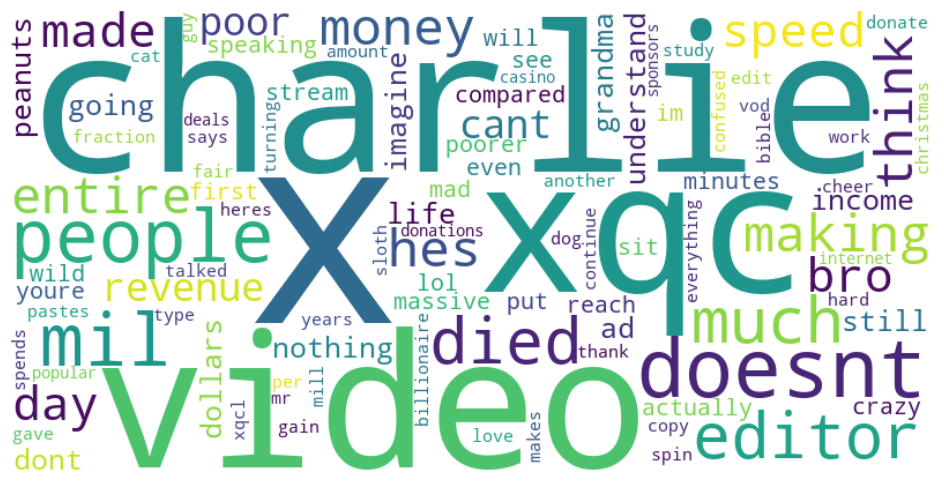

In [20]:
text_blob = " ".join(top_liked["text"].astype(str).apply(clean_text))

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100
).generate(text_blob)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.title("Word Cloud of Top-Liked YouTube Comments")
plt.show()
